# Introduction to Neural Networks

A Multi-Layer Perceptron (MLP) is a type of artificial neural network with an input layer, one or more hidden layers, and an output layer, making it capable of capturing complex patterns in data. Each neuron in an MLP uses an activation function, typically non-linear, which enables the model to approximate non-linear relationships. MLPs are trained using backpropagation, adjusting weights to minimize prediction errors, and are widely applied in classification, regression, and simple pattern recognition tasks.

## Outline
1. Introduction
2. Recap of Crucial Calculus Concepts, Sigmoid Functions, and BCE
3. Data Preparation
4. MinMaxScaler Class
5. Single Sigmoid Neuron Implementation
6. Artificial Neural Network (ANN) Implementation
7. Training and Evaluation
8. Ideas to Deepen Your Knowledge


## Introduction
This Jupyter notebbok demonstrates a sigmoid neuron and a simple neural network from scratch by using only the NumPy library (and MatPlotLib for display).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

## Recap of Crucial Calculus Concepts, Sigmoid Functions, and BCE
### Calculus refresh
#### Chain Rule

The **chain rule** is used to differentiate composite functions. For two functions \( f(g(x)) \), the chain rule states that:

$$
\frac{d}{dx} f(g(x)) = f'(g(x)) \cdot g'(x) = \frac{df}{dg} \cdot\frac{dg}{dx}
$$

In the context of neural networks, we often use the chain rule to backpropagate gradients through multiple layers, where each layer applies a function to the output of the previous layer.

#### Derivative of the Natural Logarithm

The derivative of the natural logarithm function is:

$$
\frac{d}{dx} \ln(x) = \frac{1}{x}
$$


### Logistic function sigma and its derivative

$$
\begin{align}
\sigma(z) &= \frac{1}{1+e^{-z}}
\\
\sigma'(z) &= \sigma(z)(1 - \sigma(z))
\end{align}
$$

In [2]:
def sigma(z):
    """The sigmoid function."""
    return 1 / (1 + np.e**(-1*z))

def d_sigma(z):
    """The derivative of the sigmoid function."""
    return sigma(z) * (1 - sigma(z))

Plot the sigmoid function and its derivative.

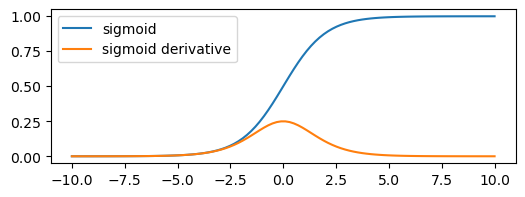

In [3]:
# Plot the sigmoid and its derivative
x = np.linspace(-10, 10, 100)
y1 = sigma(x)
y2 = d_sigma(x)

# set figure size
plt.figure(figsize=(6, 2))
plt.plot(x, y1, label='sigmoid')
plt.plot(x, y2, label='sigmoid derivative')
plt.legend()
plt.show()

### Binary cross entropy
The BCE loss for a single example $i$ is:
$$
L = \text{Binary Cross Entropy}(y^{(i)}, \hat{y}^{(i)}) = -\left( y \cdot \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \cdot \log(1 - \hat{y}^{(i)}) \right)
$$

For a batch of $m$ examples, the average BCE loss is:

$$
L = \text{Binary Cross Entropy}(y, \hat{y}) = - \frac{1}{m}\sum\left( y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right)
$$

To perform backpropagation, we need to compute the partial derivative of the loss $L$ with respect to the predicted output $\hat{y}^{(i)}$ for each example $i$:

$$
\frac{\partial L}{\partial \hat{y}^{(i)}} = 
- \frac{1}{m} \left( \frac{y^{(i)}}{\hat{y}^{(i)}} + \frac{1 - y^{(i)}}{1 - \hat{y}^{(i)}}  \right)
$$

In [4]:
# Binary cross entropy
# import numpy as np

def binary_cross_entropy(y, y_hat):
    """Compute the binary cross entropy loss.
    
    Parameters:
    y (array-like): Binary vector of true labels (0 or 1).
    y_hat (array-like): Vector of predicted probabilities.

    Returns:
    float: Binary cross entropy loss.
    """
    y = np.array(y)
    y_hat = np.array(y_hat)
    y_hat = np.clip(y_hat, 1e-15, 1 - 1e-15)     # to avoid log(0)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

def binary_cross_entropy_derivative(y, y_hat):
    """Compute the binary cross entropy loss derivative w.e.t. y_hat.
    
    Parameters:
    y (array-like): Binary vector of true labels (0 or 1).
    y_hat (array-like): Vector of predicted probabilities.

    Returns:
    array-like: Binary cross entropy loss derivative.
    """
    y = np.array(y)
    y_hat = np.array(y_hat)
    m = y.shape[0]
    return -((y - y_hat) / (y_hat * (1 - y_hat)))


The output of `binary_cross_entropy(y, y_pred)` is a loss score in the range $(0, 1)$, with lower values indicating better performance. 
The output of `binary_cross_entropy_derivative(y, y_pred)` is a vector of size $𝑚$, representing the gradient of the loss with respect to each predicted $y^{(i)} $, where $m$ is the number of examples.

In [5]:
y = [0, 0, 0, 0, 1, 1, 1, 1]
y_pred = [0.01, 0.0001, 0.2, 0.3, 0.9, 0.99, 0.9988, 0.99999]    # because of the sigmoid function, the values are in the interval (0, 1): never 0 or 1

print("binary_cross_entropy(y, y_pred):", binary_cross_entropy(y, y_pred))
print("binary_cross_entropy_derivative(y, y_pred):", binary_cross_entropy_derivative(y, y_pred))


binary_cross_entropy(y, y_pred): 0.08832380103057799
binary_cross_entropy_derivative(y, y_pred): [ 1.01010101  1.00010001  1.25        1.42857143 -1.11111111 -1.01010101
 -1.00120144 -1.00001   ]


## Data
We have some artificial data with one input: the person's weight, and one output: whether they are obese or not.

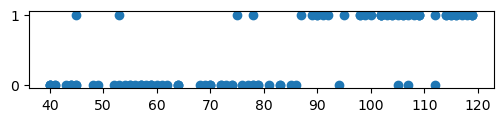

In [6]:
# Data

# weight in kgs
x = [40, 40, 40, 40, 41, 41, 43, 44, 44, 44, 45, 45, 45, 48, 49, 52, 53, 53, 54, 55, 55, 56, 57, 57, 57, 58, 59, 59, 59, 60, 61, 62, 64, 64, 64, 68, 69, 70, 70, 70, 72, 72, 73, 74, 74, 75, 76, 77, 78, 78, 78, 79, 79, 81, 83, 83, 85, 86, 87, 89, 90, 90, 91, 92, 94, 95, 98, 98, 99, 100, 102, 102, 102, 102, 103, 104, 104, 105, 105, 106, 106, 107, 107, 108, 109, 109, 109, 112, 112, 114, 114, 115, 115, 116, 116, 117, 118, 119, 119, 119]
# obese yes or no
y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Make the data numpy column arrays
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

# scatter plot
plt.figure(figsize=(6, 1))
plt.scatter(x, y)

#### MinMaxScaler class
The MinMaxScaler scales features to $(0, 1)$ range, which helps models converge faster and improves stability by preventing features with larger ranges from dominating the learning process. It also ensures that all features contribute equally, making it particularly useful for algorithms sensitive to feature magnitude, like neural networks and gradient descent-based models.

Using MinMaxScaler within a separate class allows it to be fit on the training data, capturing the scaling parameters (min and max values) needed for consistent transformation. This way, we can apply the same scaling to test and new data, ensuring they are transformed identically to the training set and preventing data leakage.

In [10]:
class MinMaxScaler:
    """The MinMaxScaler scales features to $(0, 1)$ range."""
    def __init__(self):
        self.X_min = None
        self.X_max = None

    def fit(self, X):
        """Compute the scaling parameters (min and max values) from training data."""
        self.X_min = X.min(axis=0)     # learn the scaling parameters (from training data)
        self.X_max = X.max(axis=0)

    def transform(self, X):            # apply the scaling
        return 2 * (X - self.X_min) / (self.X_max - self.X_min) - 1


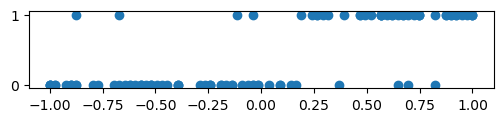

In [8]:
# Use the MinMaxScaler to scale the data in the range [-1, 1]

mm_scaler = MinMaxScaler()
mm_scaler.fit(x)                  # learn the scaling parameters
x = mm_scaler.transform(x)        # apply the scaling

# scatter plot
plt.figure(figsize=(6, 1))
plt.scatter(x, y)

## A single sigmoid neuron 
We need to define the methods:
- `__init__(self, inputs)`, which initializes the weight matrix and saves it to self
- `forward (X)`, which implements the forward pass
- `bacward (loss)`, which calculates the gradient for each weight w.r.t. the loss
- `update (learning_rate)`, which updates the weights

The neuron can take several inputs and return a single output, known as a logit. Technically, the sigmoid neuron is very similar to logistic regression, with the difference being that the neuron is part of a network structure that allows for multiple layers and connections between neurons.

### Gradient of a Sigmoid Neuron 

If the sigmoid neuron is followed by another ANN layer (instead of directly connecting to a binary cross-entropy loss), the gradient with respect to $ w $ needs to account for the gradient flow from the downstream layers in the network.


For a hidden layer, the gradient with respect to $ w $ is derived using the chain rule, incorporating the error from the layers that follow. Specifically:

$$
\frac{\partial L}{\partial w} = \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial w} =\frac{\partial L}{\partial z} \cdot x
$$

$$
\frac{\partial L}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \frac{\partial L}{\partial z} x^{(i)} 
$$

Vectorized, the gradient can be expressed as:

$$
\frac{\partial L}{\partial w} = \frac{1}{m} X^T \times \frac{\partial L }{\partial z}
$$

where:
- $ \frac{\partial L}{\partial z} $ is the "error signal" for this neuron, computed as:

$$
 \frac{\partial L}{\partial z} = \frac{\partial L}{\partial \hat{y}} \cdot \sigma(z)(1 - \sigma(z))
$$

- $ \frac{\partial L}{\partial \hat{y}} $ represents the gradient of the loss with respect to the output of this neuron as computed by the downstream layers.
- $ \sigma(z)(1 - \sigma(z)) $ is the derivative of the sigmoid function.
- $ X $ is the input matrix **to this neuron**.

In [11]:
class SingleSigmoidNeuron:
    def __init__(self, inputs) -> None:   
        """Initialize the weights"""      
        self.w = np.random.randn(inputs, 1) * 0.01  # array of weights, a column vector of dimensions (inputs, 1)
        self.b = np.random.randn() * 0.01         # single bias (one number)
        self.d_w = None     # derivatives of the loss w.r.t. the weights
        self.d_b = None     # derivative of the loss w.r.t. the bias

    def forward(self, X):
        """Compute the forward pass of the sigmoid neuron activation."""
        self.X = X                                  # save the input because we will need it in the backward pass
        self.z = X @ self.w + self.b                # linear output matrix multiplication + bias with broadcasting
        self.y_hat = sigma(self.z)                  # sigmoid activation
        return self.y_hat

    def backward(self, d_loss_d_y_hat):
        """Backpropagation through Sigmoid, applying the chain rule.
        d_loss_d_y_hat: derivative of the loss w.r.t. the output of the sigmoid. A vector of shape (m, 1), where m is the number of training examples."""
        m = self.X.shape[0]                               # number of training examples
        d_y_hat_d_z = self.y_hat * (1 - self.y_hat)       # "local" derivative of the sigmoid
        # d_z_d_w = self.X.T                              # "local" derivative of the linear output z w.r.t. the weights
        # d_z_d_b = 1                                     # "local" derivative of the linear output z w.r.t. the bias
        # Compute gradients using the chain rule
        self.d_w = (1 / m) * (self.X.T @ (d_loss_d_y_hat * d_y_hat_d_z))  # Gradient w.r.t. weights
        self.d_b = (d_loss_d_y_hat * d_y_hat_d_z).mean(axis=0)  # Gradient w.r.t. bias (mean over batch)        

    def update(self, learning_rate):
        """Gradient Descent Update: update weights opposite to the gradient, scaled by learning rate."""
        self.w -= learning_rate * self.d_w           # update the weights
        self.b -= learning_rate * self.d_b  

    def print_status(self):
        print("w, b =", self.w, self.b)


In [16]:
# Example usage:
np.random.seed(42)  # For reproducibility

my_neuron = SingleSigmoidNeuron(1)   # with one input, one output
my_neuron.print_status()

# Before training
y_hat = my_neuron.forward(x)
loss = binary_cross_entropy(y, y_hat)
print("Loss before training:", loss)

learning_rate = 1

for epoch in range(100000):
    if epoch % 1000==0:
        y_hat = my_neuron.forward(x)
        loss = binary_cross_entropy(y, y_hat)
        print(':))')
        my_neuron.print_status()
        print("----------------------\nEpoch:", epoch, "Loss:", loss)

       # my_neuron.backward_BCE(y)  
        my_neuron.backward(binary_cross_entropy_derivative(y, y_hat))
        my_neuron.update(learning_rate)

w, b = [[0.00496714]] -0.0013826430117118466
Loss before training: 0.6919068869079288
:))
w, b = [[0.00496714]] -0.0013826430117118466
----------------------
Epoch: 0 Loss: 0.6919068869079288
:))
w, b = [[0.23220158]] [-0.08104547]
----------------------
Epoch: 1000 Loss: 0.6372231619188328
:))
w, b = [[0.43728515]] [-0.14129706]
----------------------
Epoch: 2000 Loss: 0.5939789980355229
:))
w, b = [[0.62280775]] [-0.18741553]
----------------------
Epoch: 3000 Loss: 0.5592656230904987
:))
w, b = [[0.79123417]] [-0.22343109]
----------------------
Epoch: 4000 Loss: 0.5309963585831765
:))
w, b = [[0.9447592]] [-0.25227154]
----------------------
Epoch: 5000 Loss: 0.5076753657630578
:))
w, b = [[1.08528139]] [-0.27600699]
----------------------
Epoch: 6000 Loss: 0.48821558072875876
:))
w, b = [[1.21442352]] [-0.29608175]
----------------------
Epoch: 7000 Loss: 0.47181270769706607
:))
w, b = [[1.33356721]] [-0.31349872]
----------------------
Epoch: 8000 Loss: 0.4578611110328704
:))
w, 

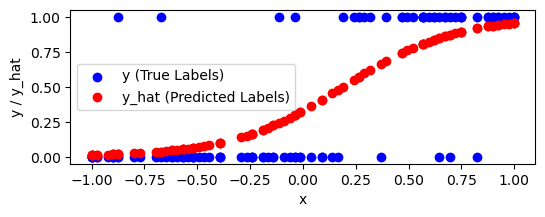

In [17]:

plt.figure(figsize=(6, 2))
plt.scatter(x, y, color='blue', label='y (True Labels)')
plt.scatter(x, y_hat, color='red', label='y_hat (Predicted Labels)')
plt.xlabel('x')
plt.ylabel('y / y_hat')
plt.legend()
plt.show()

_____________________________________

## A simple ANN
We will define an artificial neural network for binary classification that will implement the following methods:
- `fit(X, y)`
- `predict (X)`

Each of the layers in our network will be an instance of the class _layer_ with the following attributes:
- number of inputs
- number of units

All units are sigmoid neurons:
- The nonlinear function in each unit is the sigmoid function.
- The loss function is binary cross entropy (BCE)

### Representation of Weights and Biases

Note: While we could in principle use the `SingleSigmoidNeuron` class defined earlier, it is better to represent a layer of a neural network as a matrix for efficiency.

If a layer has $ n $ inputs (features), this means that each of its neurons will have $ n $ weights (plus a bias). If our layer has $ k $ neurons per layer, we can represent all the parameters of the layer as matrices:

- **Weight Matrix**: The weights for all neurons in the layer can be represented as a matrix $ W $ of shape $ (n, k) $, where each column corresponds to the weights for one neuron.

- **Bias Vector**: The biases for all neurons can be represented as a row vector $ b $ of shape $ (1, k) $.

The output of the layer can then be computed using matrix operations:

$$
z = XW + b
$$

where $ z $ is the linear combination of inputs for each neuron. The final output after applying the sigmoid activation function is:

$$
\hat{y} = \sigma(z)
$$


### A Simple ANN Implementation

In [19]:
class layer:
    def __init__(self, inputs, outputs) -> None:
        """Initialize the weights and biases of the layer.
        inputs is the number of features
        outputs is the number of neurons in the layer"""
        self.w = np.random.randn(inputs, outputs) * 0.01      # initialize the weights
        self.b = np.random.randn(1, outputs) * 0.01           # initialize the biases (row vector)
        self.d_w = None                                       # placeholders for the gradients
        self.d_b = None

    def forward(self, X):
        """Compute the forward pass of the layer."""
        self.X = X                             # save the input because we will need it in the backward pass
        self.z = X @ self.w + self.b           # linear output
        self.y_hat = sigma(self.z)             # activation
        return self.y_hat

    def backward(self, d_loss_d_y_hat):
        """Comute the gradients of the loss w.r.t. the weights and biases."""
        m = self.X.shape[0]                    # number of training examples
        d_y_hat_d_z = self.y_hat * (1 - self.y_hat)   # "local" derivative of the sigmoid
        self.d_w = (1 / m) * (self.X.T @ (d_loss_d_y_hat * d_y_hat_d_z))  # gradient of the loss w.r.t. the weights
        self.d_b = (d_loss_d_y_hat * d_y_hat_d_z).mean(axis=0)   # gradient of the loss w.r.t. the bias
        return (d_loss_d_y_hat * d_y_hat_d_z) @ self.w.T  # return the gradient w.r.t. the input

    def update(self, learning_rate):
        """Update the weights and biases."""
        self.w -= learning_rate * self.d_w
        self.b -= learning_rate * self.d_b

    def print_status(self):
        print("w, b =", self.w, self.b)


The class `NeuralNetwork` uses the class `layer`.

In [21]:
class NeuralNetwork:
    """A simple 2-layer neural network with sigmoid activation for binary classification."""

    def __init__(self, inputs, hidden, outputs) -> None:
        """Initialize a neural network with 2 layers."""
        self.layer1 = layer(inputs, hidden)            # The output of the first layer is the input of the second layer
        self.layer2 = layer(hidden, outputs)

    def forward(self, X):
        return self.layer2.forward(self.layer1.forward(X))

    def backward(self, y_hat, y):
        loss = self.layer2.backward(binary_cross_entropy_derivative(y, y_hat))     # defined at the beginning of the notebook
        self.layer1.backward(loss)

    def update(self, learning_rate):
        self.layer1.update(learning_rate)
        self.layer2.update(learning_rate)

    def print_status(self):
        self.layer1.print_status()
        self.layer2.print_status()

    # Public API
    def predict_proba(self, X):
        return self.forward(X)
    
    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold
    
    def fit(self, X, y, epochs, learning_rate):
        """Fit the model to the data X, y using gradient descent."""
        for epoch in range(epochs):
            y_hat = self.forward(X)
            self.backward(y_hat, y)
            self.update(learning_rate)
            if epoch % 1000 == 0:
                loss = binary_cross_entropy(y, y_hat)
                print("----------------------\nEpoch:", epoch, "Error:", loss)
                self.print_status()

### 2D Data
Let's test our neural network on a non-linear problem, trying to separate the points within a circle from points outside.

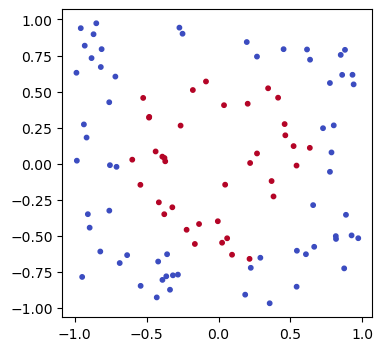

In [24]:
# Data
# A circle with radius 1 and center (0, 0) is defined by the equation x^2 + y^2 = r^2
# We generate random points in the square [-1, 1] x [-1, 1] and check if they are inside the circle
np.random.seed(42)
m_train, m_test = 100, 10000
X_train = 2 * np.random.rand(m_train, 2) - 1
y_train = (X_train[:, 0]**2 + X_train[:, 1]**2 < 0.5).astype(int).reshape(-1, 1)    # r^2 = 0.5

X_test = 2 * np.random.rand(m_test, 2) - 1
y_test = (X_test[:, 0]**2 + X_test[:, 1]**2 < 0.5).astype(int).reshape(-1, 1)    # r^2 = 0.5

plt.figure(figsize=(4, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), cmap='coolwarm', s=10)
plt.show()


In [25]:
# train the neural network on these data
np.random.seed(42)
nn = NeuralNetwork(2, 4, 1)    # 2 inputs, 4 hidden neurons, 1 output
learning_rate = 1
nn.fit(X_train, y_train, 10000, learning_rate)  # 10,000 epochs



----------------------
Epoch: 0 Error: 0.6893699371400676
w, b = [[ 0.0049718  -0.00141949  0.00644368  0.01521948]
 [-0.00233676 -0.0023791   0.01575813  0.00766326]] [[-0.00476886  0.00601164 -0.00410587 -0.00448508]]
w, b = [[-0.05869192]
 [-0.08056656]
 [-0.07832392]
 [-0.06669606]] [[-0.1326489]]
----------------------
Epoch: 1000 Error: 0.658822842543096
w, b = [[-0.081213   -0.1053771  -0.08859963 -0.07143233]
 [-0.13580524 -0.16324915 -0.13116467 -0.12658895]] [[-0.01099586 -0.00533377 -0.01009484 -0.00918051]]
w, b = [[-0.16645171]
 [-0.2089854 ]
 [-0.17778702]
 [-0.16035992]] [[-0.17634994]]
----------------------
Epoch: 2000 Error: 0.6587267039947949
w, b = [[-0.13325278 -0.18070007 -0.14517861 -0.11890609]
 [-0.22299027 -0.28462473 -0.22390454 -0.20718444]] [[-0.0572832  -0.09637103 -0.06109449 -0.04704651]]
w, b = [[-0.21872532]
 [-0.29389437]
 [-0.23195974]
 [-0.20311671]] [[-0.07201575]]
----------------------
Epoch: 3000 Error: 0.658573253122356
w, b = [[-0.14192958 -0.

#### Plot the decision boundary

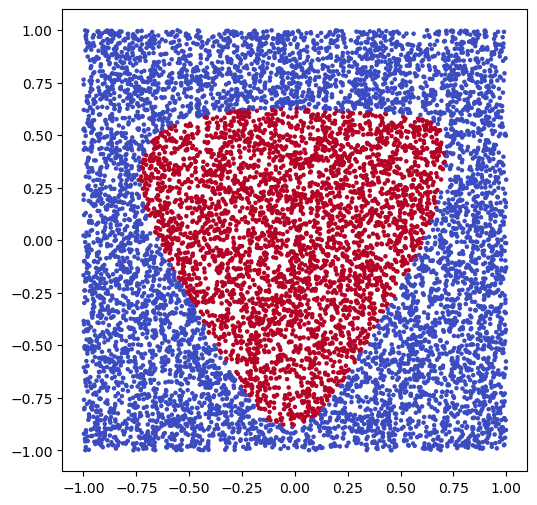

In [26]:
# Plot the decision boundary
y_hat = nn.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_hat.ravel(), cmap='coolwarm', s=5)

#### Inspect the errors

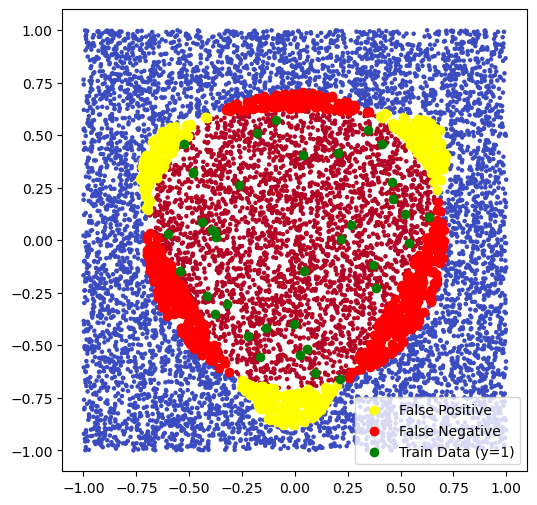

In [27]:
# Inspect the false positives and false negatives, compared to the training data

plt.figure(figsize=(6, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_hat.ravel(), cmap='coolwarm', s=5)
# False Positives (FP): Predicted 1, but actually 0
plt.scatter(X_test[(y_test.ravel() == 0) & (y_hat.ravel() == 1), 0], X_test[(y_test.ravel() == 0) & (y_hat.ravel() == 1), 1], color='yellow', label='False Positive')

# False Negatives (FN): Predicted 0, but actually 1
plt.scatter(X_test[(y_test.ravel() == 1) & (y_hat.ravel() == 0), 0], X_test[(y_test.ravel() == 1) & (y_hat.ravel() == 0), 1], color='red', label='False Negative')
plt.scatter(X_train[y_train.ravel() == 1, 0], X_train[y_train.ravel() == 1, 1], color='green', label='Train Data (y=1)')
plt.legend()
plt.show()


Can our single sigmoid neuron also fit this data?

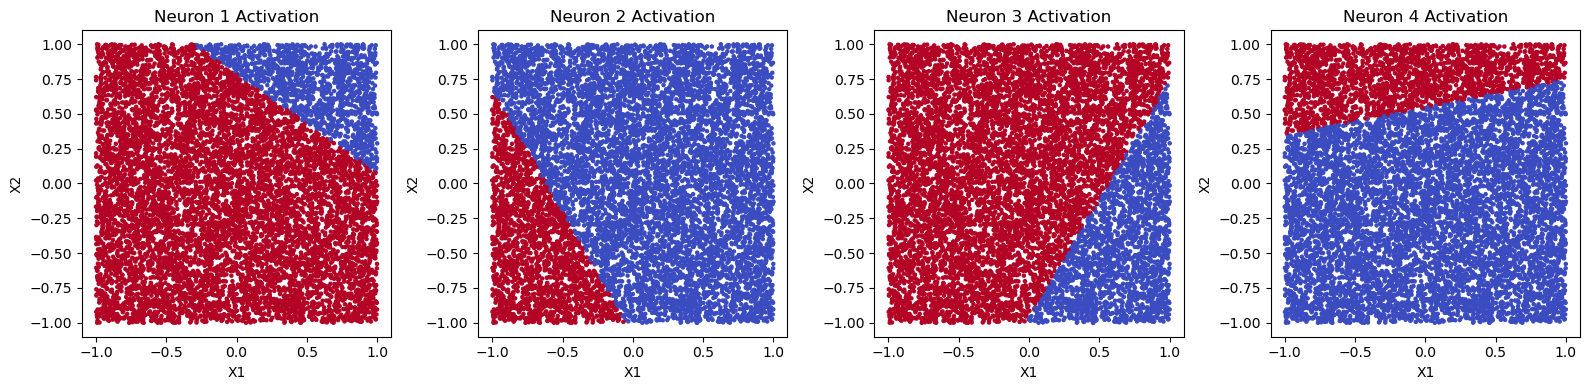

In [28]:
# Inspect the inner workings of the neural network by plotting the decision boundary and the hidden layer activations
# The hidden layer activations are the output of the first layer of the neural network
hidden_activations = nn.layer1.forward(X_test)
# binarize the hidden activations based on the threshold 0.5
hidden_activations = hidden_activations >= 0.5

# Plot a figure for each neuron
fig, axes = plt.subplots(1, hidden_activations.shape[1], figsize=(4 * hidden_activations.shape[1], 4))
axes = axes.ravel()

for i in range(hidden_activations.shape[1]):
    axes[i].scatter(X_test[:, 0], X_test[:, 1], c=hidden_activations[:, i], cmap='coolwarm', s=5)
    axes[i].set_title(f'Neuron {i+1} Activation')
    axes[i].set_xlabel('X1')
    axes[i].set_ylabel('X2')

plt.tight_layout()
plt.show()


## Ideas to Deepen Your Knowledge
1. Are the hidden layers the same regardless the inicialization? 
2. How does changing the number of neurons in the hidden layer change the final fitting?
3. What happens if we add noise to the training data?
4. Can our neural network fit also some more interesting shapes (e.g. a heart). 
5. Try applying our neural network to some real dataset.


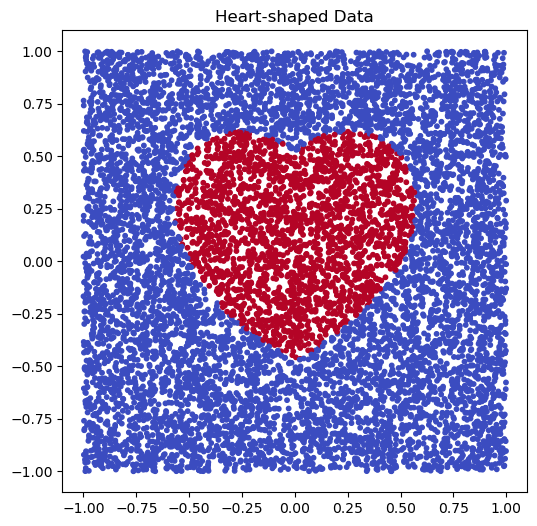

In [36]:
# Define the heart shape function
def is_heart(x1, x2):
    x = 2 * x1 
    y = 2 * x2 
    return ((x**2 + y**2 - 1)**3 - x**2 * y**3) <= 0

# Generate labels for X_train based on the heart shape function
y_train_heart = np.array([is_heart(x[0], x[1]) for x in X_test]).astype(int).reshape(-1, 1)

# Plot the heart-shaped data
plt.figure(figsize=(6, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_train_heart.ravel(), cmap='coolwarm', s=10)
plt.title('Heart-shaped Data')
plt.show()

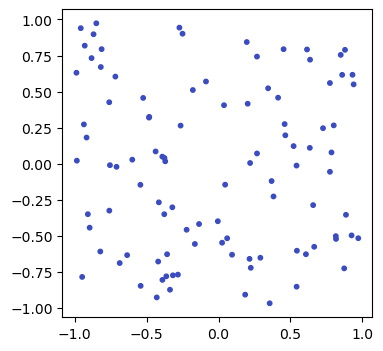

In [39]:
# Data

np.random.seed(42)
m_train, m_test = 100, 10000
X_train = 2 * np.random.rand(m_train, 2) - 1
y_train_heart = np.array([is_heart(x[0], x[1]) for x in X_train]).astype(int).reshape(-1, 1)

X_test = 2 * np.random.rand(m_test, 2) - 1
y_test_heart = np.array([is_heart(x[0], x[1]) for x in X_test]).astype(int).reshape(-1, 1)

plt.figure(figsize=(4, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), cmap='coolwarm', s=10)
plt.show()


In [40]:
# train the neural network on these data
np.random.seed(42)
nn = NeuralNetwork(2, 4, 1)    # 2 inputs, 4 hidden neurons, 1 output
learning_rate = 1
nn.fit(X_train, y_train, 10000, learning_rate)  # 10,000 epochs



----------------------
Epoch: 0 Error: 0.6782991354026877
w, b = [[ 0.00497844 -0.00147197  0.00639636  0.01520405]
 [-0.00233376 -0.00240279  0.01573678  0.0076563 ]] [[-0.00499267  0.00778141 -0.00251035 -0.00396497]]
w, b = [[-0.24324694]
 [-0.26607512]
 [-0.26285794]
 [-0.25121398]] [[-0.5026489]]
----------------------
Epoch: 1000 Error: 0.00031823945731825163
w, b = [[-0.01714361 -0.02389953 -0.01621174 -0.00747181]
 [-0.01767698 -0.01813183 -0.00052378 -0.00812649]] [[0.64326002 0.67287165 0.65917418 0.64970355]]
w, b = [[-1.79235139]
 [-1.82961326]
 [-1.81783182]
 [-1.80242671]] [[-3.28385519]]
----------------------
Epoch: 2000 Error: 0.00015067975015438357
w, b = [[-0.01939167 -0.02608537 -0.01847854 -0.00982858]
 [-0.01928569 -0.01974778 -0.00230919 -0.00982712]] [[0.73219273 0.76269209 0.74886297 0.73894404]]
w, b = [[-1.93510729]
 [-1.9738055 ]
 [-1.96134716]
 [-1.94547707]] [[-3.49835346]]
----------------------
Epoch: 3000 Error: 9.750597756193676e-05
w, b = [[-0.0206009

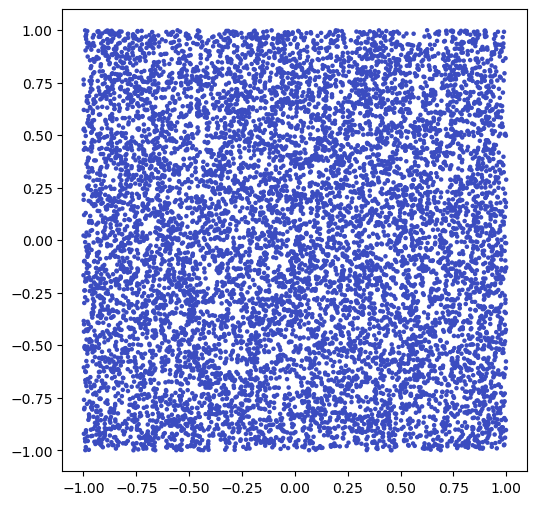

In [41]:
# Plot the decision boundary
y_hat = nn.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_hat.ravel(), cmap='coolwarm', s=5)